### #03 - Projeto - Visualização de dados

In [1]:
# notebook para visualização de gráficos referentes ao dataset sobre Fireballs
'''
kt(kiloton): Unidade que serve para avaliar a potência de uma arma nuclear, comparando a energia produzida
pela explosão com a energia produzida pela explosão de 1 000 toneladas de trinitrotolueno (ou T. N. T.)
 
altitude: distância em quilômetros (km) entre o evento registrado e a Terra (geoide de referência)
----------------------------------------------------------------------------------------------------
Sugestões de gráficos:
• Gráfico de dispersão para analisar correlação e tendências de duas variáveis
• Histograma para entender frequências dos dados
• Gráfico de barra ou linha de acordo com o tipo de dado trabalhado
'''
import numpy as np
import pandas as pd
import seaborn as sns
from math import log
import datetime

df = pd.read_csv('datasets/cneos_fireball_data.csv', on_bad_lines='warn')
df.head(3)

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-04-15 08:22:01,20.1S,36.0E,41.4,17.2,1.6,-14.7,8.8,3.097000e+12,6.300
1,2023-04-06 14:47:39,57.4N,109.9E,31.2,22.1,8.6,3.6,-20.0,7.200000e+10,0.230
2,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086


## Analisando correlações entre as variáveis

In [2]:
# Verificando a correlação entre as variáveis a partir da matriz de dispersão
df.corr(method='pearson', numeric_only=True)

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Altitude (km),1.000000,0.158080,-0.042589,-0.011952,-0.058933,-0.071156,-0.078851
Velocity (km/s),0.158080,1.000000,0.042015,-0.155725,-0.166425,0.003765,0.002862
vx,-0.042589,0.042015,1.000000,-0.122349,0.001900,0.081249,0.086136
vy,-0.011952,-0.155725,-0.122349,1.000000,0.076239,-0.060104,-0.059950
vz,-0.058933,-0.166425,0.001900,0.076239,1.000000,-0.019473,-0.021706
Total Radiated Energy (J),-0.071156,0.003765,0.081249,-0.060104,-0.019473,1.000000,0.998149
Calculated Total Impact Energy (kt),-0.078851,0.002862,0.086136,-0.059950,-0.021706,0.998149,1.000000


Assim observamos:
- uma correlação muito forte entre Total Radiated Energy (J) e Calculated Total Impact Energy (kt)
- demais pares de variáveis não apresentam corrrelação entre si
Para visualizar a correlação, usaremos o gráfico de dispersão

In [3]:
radiated_energy_log = np.log10(df['Total Radiated Energy (J)'])
df['Total Radiated Energy (J) - log[10]'] = radiated_energy_log

#impact_energy_log = np.log10(df['Calculated Total Impact Energy (kt)'])
#df['Calculated Total Impact Energy (kt) - log[10]'] = impact_energy_log
impact_energy_log = np.array([log(x,100) for x in df['Calculated Total Impact Energy (kt)']])
df['Calculated Total Impact Energy (kt) - log[100]'] = impact_energy_log

<Axes: xlabel='Total Radiated Energy (J) - log[10]', ylabel='Calculated Total Impact Energy (kt) - log[100]'>

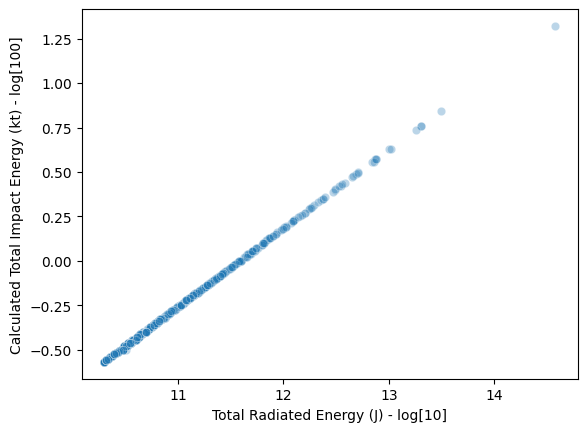

In [4]:
sns.scatterplot(data=df, y='Calculated Total Impact Energy (kt) - log[100]', x='Total Radiated Energy (J) - log[10]',
               alpha=0.3) 

<Axes: xlabel='Calculated Total Impact Energy (kt) - log[100]', ylabel='Total Radiated Energy (J) - log[10]'>

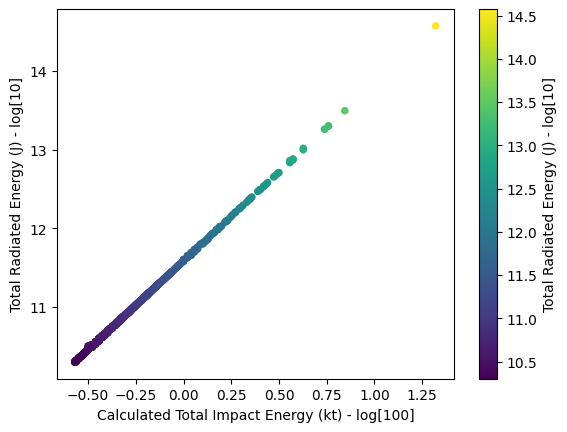

In [5]:
# usando o plot do pandas
df.plot.scatter(x='Calculated Total Impact Energy (kt) - log[100]',
                y='Total Radiated Energy (J) - log[10]',
                c='Total Radiated Energy (J) - log[10]',
                colormap='viridis')

### Frequência da Altitude

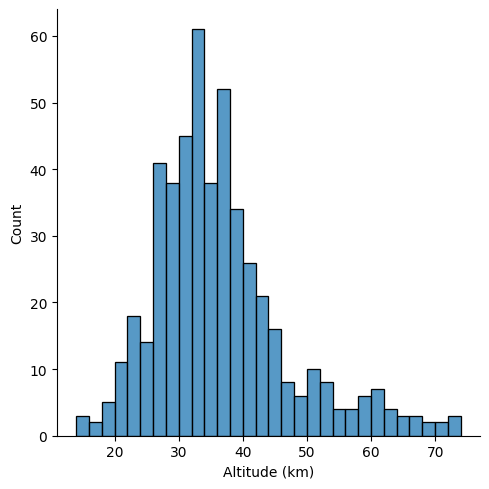

In [6]:
sns.displot(data=df,x='Altitude (km)', binwidth=2)
#sns.displot(data=df,x='Altitude (km)', bins=30)

- verificamos que a maior parte das fireballs registradas estava a 26-40 km acima da superfície do planeta 

### Frequência de Energia de Impacto

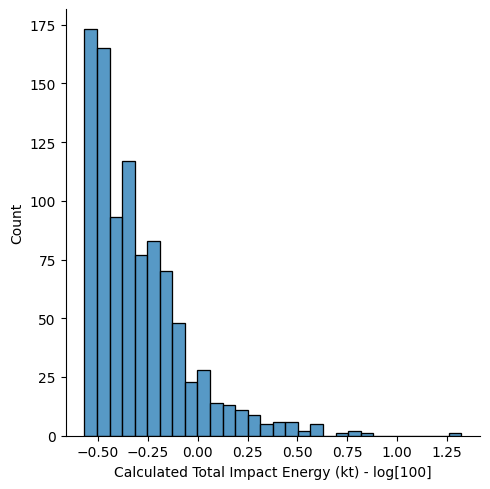

In [7]:
sns.displot(data=df,x='Calculated Total Impact Energy (kt) - log[100]', bins=30)


- A maioria dos dos eventos registrava uma energia de impacto abaixo de 1 kiloton
- Outro dado destacável no gráfico é o evento de maior energia de impacto registrada, com 440 kilotons (cerca de 1.32 na escala logarítmica de base 100)

In [8]:
# buscando evento no dataset com o valor em log[100] da sua Energia de Impacto (kt)
maior_impacto = df[df['Calculated Total Impact Energy (kt) - log[100]'] > 1.25]; maior_impacto

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Total Radiated Energy (J) - log[10],Calculated Total Impact Energy (kt) - log[100]
369,2013-02-15 03:20:33,54.8N,61.1E,23.3,18.6,12.8,-13.3,-2.4,3.750000e+14,440.0,14.574031,1.321726


* Este evento atingiu a Rússia em fevereiro de 2013. Estima-se o peso de cerca de 13t. A rocha se desintegrou antes de atingir o solo, causando danos em edifícios e deixando quase mil feridos. Fonte: [Meteoro de Chelyabinsk (G1)](http://glo.bo/HKfp26). Registros em vídeo do meteoro podem ser encontrados em: [Meteor Hits Russia Feb 15, 2013](https://youtu.be/dpmXyJrs7iU)

In [ ]:
# em termos de energia emitida (), o registro de Chelyabinsk não se classifica como bólido? ### verificar

### Frequência de Velocidade

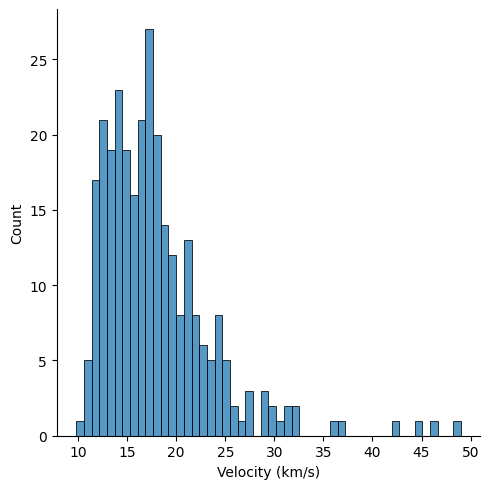

In [9]:
sns.displot(data=df,x='Velocity (km/s)', bins=50)

- a velocidade da maioria dos meteoros registrados, antes de atingir o solo, está entre 10 e 25 km/s

### Verificar datação 
- Buscar o intervalo de tempo dos eventos registrados

In [11]:
df['Peak Brightness Date/Time (UT)'].min()

'1988-04-15 03:03:10'

In [16]:
df.sort_values('Peak Brightness Date/Time (UT)', ascending=False) # do mais recente ao mais antigo

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Total Radiated Energy (J) - log[10],Calculated Total Impact Energy (kt) - log[100]
0,2023-04-15 08:22:01,20.1S,36.0E,41.4,17.2,1.6,-14.7,8.8,3.097000e+12,6.300,12.490941,0.399670
1,2023-04-06 14:47:39,57.4N,109.9E,31.2,22.1,8.6,3.6,-20.0,7.200000e+10,0.230,10.857332,-0.319136
2,2023-04-01 00:02:03,16.8S,76.0E,61.8,46.4,21.4,-40.6,7.1,2.400000e+10,0.086,10.380211,-0.532751
3,2023-03-20 06:53:23,23.7S,132.6E,34.8,NaN,NaN,NaN,NaN,2.700000e+10,0.095,10.431364,-0.511138
4,2023-03-11 08:21:28,74.7S,79.5E,32.0,NaN,NaN,NaN,NaN,4.440000e+11,1.100,11.647383,0.020696
...,...,...,...,...,...,...,...,...,...,...,...,...
948,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,10.414973,-0.518106
949,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,10.602060,-0.443028
950,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,11.740363,0.073064
951,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,12.397940,0.358002


- Os registros vão de abril de 1988 até abril de 2023 